### Khởi tạo post_df và replies_df

In [48]:
import pandas as pd
import numpy as np
import json 
from dateutil.parser import isoparser
from wordcloud import WordCloud
import matplotlib.pyplot as plt

posts_df = pd.read_csv("cleaned_posts.csv")
replies_df = pd.read_csv('cleaned_replies.csv')

### Chuyển datetime cho date

In [41]:
import dateutil.parser
import datetime

for i in range(len(posts_df)):
    if not isinstance(posts_df.loc[i, 'date'], datetime.datetime):
        posts_df.loc[i, 'date'] = dateutil.parser.isoparse(posts_df.loc[i, 'date'])

for time in posts_df['date']:
    print(time.month)


11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
1

### Phân tích nội dung thuần


#### 1. Sử dụng `wordcloud` để biễu diễn cơ bản về những `keyword` sẽ xuất hiện trong bài đăng của người dùng.


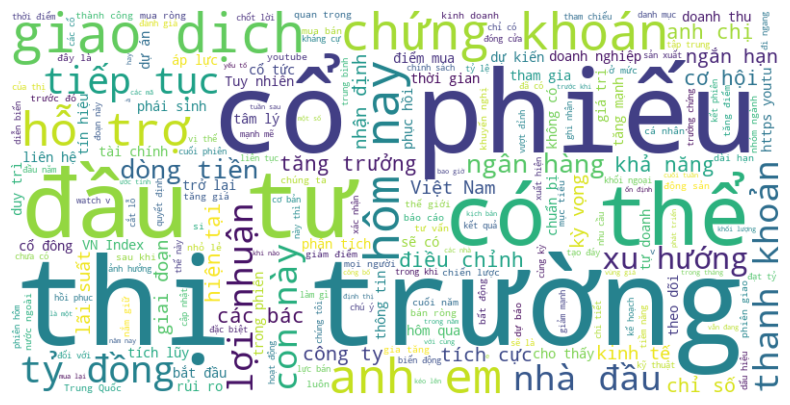

In [27]:


# Kết hợp tất cả văn bản từ cột 'originalContent'
text = " ".join(content for content in posts_df.originalContent)

# Tạo wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nhận xét:
- Ngoài `cổ phiếu`, `giao dịch`, `thị trường` thì có 1 số keyword đáng chú ý là `thanh khoản`, `điểm mua`, `kỳ vọng` là những keyword đáng chú ý.

#### 2. Đặt vấn đề về những đường link có xuất hiện trong nội dung của các bài viết. 

Để phân tích ta sẽ sử dụng thư viện `re` để tìm các đường link trong cột `originalContent` của dataframe `posts_df`.

In [ ]:

import re

# Tìm tất cả các đường link trong cột 'originalContent'
posts_df['links'] = posts_df['originalContent'].apply(lambda x: re.findall(r'(https?://\S+)', x))

# Chuyển sentiment từ dạng số sang string
posts_df['sentiment'] = posts_df['sentiment'].astype('string')
posts_df['sentiment'] = posts_df['sentiment'].replace({'1': 'positive', '0': 'neutral', '-1': 'negative'})

# Tạo một dataframe mới chỉ chứa các bài viết có đường link
links_df = posts_df.explode('links')[['date', 'postID', 'links', 'sentiment']].dropna().reset_index(drop=True)

links_df
# Trích xuất loại links từ cột 'links'
links_df['links'] = links_df['links'].apply(lambda x: x.replace('youtu.be', 'youtube.com') if 'youtu.be' in x else x)
links_df['link_type'] = links_df['links'].apply(lambda x: re.search(r'https?://(?:www\.)?([^/]+)', x).group(1) if re.search(r'https?://(?:www\.)?([^/]+)', x) else None)

links_df


date    postID  \
0     2024-11-06 21:38:45.743000+07:00  29104016   
1     2024-11-06 21:38:26.107000+07:00  29104004   
2     2024-11-06 21:35:57.050000+07:00  29103932   
3     2024-11-06 21:33:38.580000+07:00  29103860   
4     2024-11-06 21:28:34.473000+07:00  29103739   
...                                ...       ...   
10648 2024-09-06 10:17:02.760000+07:00  28009227   
10649 2024-09-06 10:14:16.993000+07:00  28009092   
10650 2024-09-06 10:12:48.367000+07:00  28009016   
10651 2024-09-06 10:11:00.183000+07:00  28008910   
10652 2024-09-06 10:00:14.720000+07:00  28008342   

                                                   links sentiment  \
0      https://www.youtube.com/live/rfLkHPX-CJo?si=5x...   neutral   
1      https://chungkhoannhatrang.vn/khanh-hoa-ban-ha...   neutral   
2      https://youtube.com/shorts/rH3OON8pU2A?si=8wCa...   neutral   
3      https://www.youtube.com/watch?v=5Aj7jDO1VSY&t=11s  positive   
4      https://youtube.com/clip/UgkxkjaCQ0bGfS64zvuSt...   neutral   
...                                                  ...       ...   
10648  https://youtube.com/live/aIB78pZQilg?feature=s...   neutral   
10649  https://f247.com/t/hpg-cho-doi-lan-gio-chinh-s...   neutral   
10650  https://youtube.com/wERiDcK2BNA?si=aa3TpE65HYR...   neutral   
10651  https://f247.com/t/vn-index-dung-de-nghi-ngo-l...   neutral   
10652  https://vietnambiz.vn/hai-du-an-cua-becamex-id...   neutral   

                   link_type  
0                youtube.com  
1      chungkhoannhatrang.vn  
2                youtube.com  
3                youtube.com  
4                youtube.com  
...                      ...  
10648            youtube.com  
10649               f247.com  
10650            youtube.com  
10651               f247.com  
10652          vietnambiz.vn  

[10653 rows x 5 columns]

Mã trên sẽ tạo một dataframe `links_df` chứa các đường link và mã bài viết tương ứng.

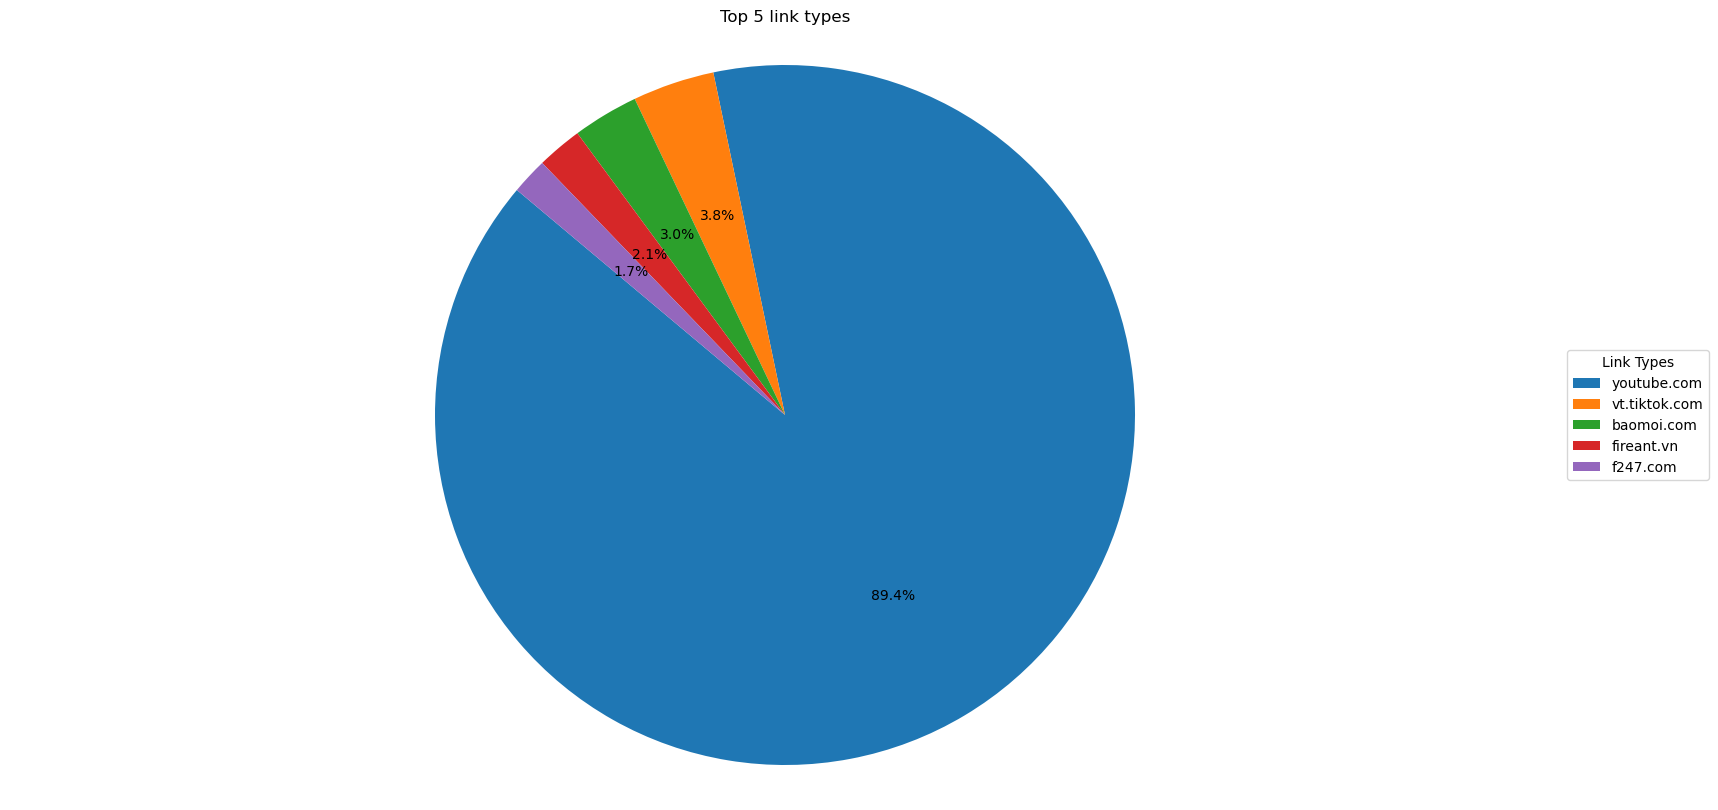

In [46]:


# Lập bảng thống kê số lượng links theo loại
link_type_counts = links_df['link_type'].value_counts().reset_index()
link_type_counts.columns = ['link_type', 'count']
link_type_counts


# Lập pie chart biểu diễn 5 links có lượt xuất hiện cao nhất
plt.figure(figsize=(20, 10))
wedges, texts, autotexts = plt.pie(link_type_counts['count'][:5], labels=None, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 5 link types')

# Thêm bảng chú thích
plt.legend(wedges, link_type_counts['link_type'][:5], title="Link Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


Nhận xét:
- Có thể thấy rằng đa số các liên kết trong bài viết đều dẫn đến các trang web bên ngoài, trong đó có nhiều liên kết đến `youtube.com`.
- Vậy ta có thể kết luận rằng người dùng thường chia sẻ các liên kết đến các trang web bên ngoài như `youtube.com` trong các bài viết của mình.


#### 3. Phân tích mỗi tương quan của sự tương tác trên bài viết và các yếu tố khác của bài viết.

In [ ]:
# Tạo một dataframe mới chứa các bài viết, độ dài bài viết, tổng lượt like, tổng lượt phản hồi, sentiment
posts_summary = posts_df[['date', 'postID', 'originalContent', 'sentiment', 'taggedSymbols']]
posts_summary['post_length'] = posts_summary['originalContent'].apply(lambda x: len(x))
posts_summary['total_likes'] = posts_df['totalLikes']
posts_summary['total_replies'] = posts_df['totalReplies']

# Săp xếp dataframe theo số lượng lượt like giảm dần
posts_summary = posts_summary.sort_values(by='total_likes', ascending=False).reset_index(drop=True)
posts_summary.head(20)

# Nhận thấy các bài viết tổng hợp của ngày là những bài có lượng tương tác cao, và lượt bình luận cao.

C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_524\227789648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_summary['post_length'] = posts_summary['originalContent'].apply(lambda x: len(x))
C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_524\227789648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_summary['total_likes'] = posts_df['totalLikes']
C:\Users\DELL Pre 7670\AppData\Local\Temp\ipykernel_524\227789648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

date    postID  \
0   2024-10-24T15:19:54.307+07:00  28869167   
1   2024-09-26T20:35:36.153+07:00  28352578   
2   2024-10-28T15:21:13.823+07:00  28923357   
3   2024-10-22T19:47:48.227+07:00  28821151   
4    2024-10-03T15:27:47.05+07:00  28483887   
5     2024-10-22T15:19:18.6+07:00  28817167   
6     2024-09-17T15:26:44.7+07:00  28172493   
7   2024-10-15T15:21:31.533+07:00  28687978   
8    2024-10-02T15:31:17.63+07:00  28457094   
9   2024-11-04T15:39:53.723+07:00  29054941   
10  2024-10-16T15:18:03.357+07:00  28711937   
11  2024-10-30T15:20:50.837+07:00  28971908   
12  2024-10-25T15:42:57.367+07:00  28895122   
13  2024-11-06T15:27:39.133+07:00  29099549   
14   2024-10-31T15:19:19.04+07:00  28999221   
15  2024-10-09T15:24:16.357+07:00  28583498   
16   2024-09-13T15:23:10.81+07:00  28125535   
17   2024-10-01T15:23:28.69+07:00  28433192   
18  2024-10-04T15:30:46.103+07:00  28507432   
19   2024-10-29T15:25:38.26+07:00  28946981   

                                      originalContent sentiment  \
0   Phái Sinh ngày 24/10/2024\n.\n- Hnay Tây Short...   neutral   
1   XU HƯỚNG TTCK QUÝ 4. 2024\n\nĐể xác định xu hư...   neutral   
2   Phái Sinh ngày 28/10/2024\n.\n- Hnay Tây Short...   neutral   
3   Hy vọng năm sau tôi và các bạn sẽ cùng nhau cổ...   neutral   
4   Phái Sinh ngày 3/10/2024\n.\n- Hnay Tây Short ...   neutral   
5   Phái Sinh ngày 22/10/2024\n.\n- Hnay Tây Short...   neutral   
6   Phái Sinh ngày 17/9/2024\n.\n- Hnay Tây Short ...   neutral   
7   Phái Sinh ngày 15/10/2024\n.\n- Hnay Tây Short...   neutral   
8   Phái Sinh ngày 2/10/2024\n.\n- Hnay Tây Long r...   neutral   
9   Phái Sinh ngày 4/11/2024\n.\n- Hnay Tây Short ...   neutral   
10  Phái Sinh ngày 16/10/2024\n.\n- Hnay Tây Short...   neutral   
11  Phái Sinh ngày 30/10/2024\n.\n- Hnay Tây Short...   neutral   
12  Phái Sinh ngày 25/10/2024\n.\n- Hnay Tây Long ...   neutral   
13  Phái Sinh ngày 6/11/2024\n.\n- Hnay Tây Long r...   neutral   
14  Phái Sinh ngày 31/10/2024\n.\n- Hnay Tây Long ...   neutral   
15  Phái Sinh ngày 9/10/2024\n.\n- Hnay Tây Long r...   neutral   
16  Phái Sinh ngày 13/9/2024\n.\n- Hnay Tây Long r...   neutral   
17  Phái Sinh ngày 1/10/2024\n.\n- Hnay Tây Long r...   neutral   
18  Phái Sinh ngày 4/10/2024\n.\n- Hnay Tây Short ...   neutral   
19  Phái Sinh ngày 29/10/2024\n.\n- Hnay Tây Short...   neutral   

                                        taggedSymbols  post_length  \
0   [{"symb": "^DJI", "price": 42514.95}, {"symb":...          836   
1   [{"symb": "^DJI", "price": 42166.66}, {"symb":...         5785   
2   [{"symb": "^DJI", "price": 42114.4}, {"symb": ...          839   
3   [{"symb": "BSR", "price": 21.3}, {"symb": "DXG...         5372   
4   [{"symb": "$BTC", "price": 61459.01}, {"symb":...          774   
5   [{"symb": "^DJI", "price": 42931.6}, {"symb": ...          836   
6   [{"symb": "^DJI", "price": 41622.08}, {"symb":...          926   
7   [{"symb": "^DJI", "price": 43065.22}, {"symb":...         1195   
8   [{"symb": "$BTC", "price": 61728.04}, {"symb":...          784   
9   [{"symb": "^DJI", "price": 42052.19}, {"symb":...          837   
10  [{"symb": "^DJI", "price": 42740.42}, {"symb":...          974   
11  [{"symb": "^DJI", "price": 42233.05}, {"symb":...          837   
12  [{"symb": "^DJI", "price": 42114.4}, {"symb": ...          834   
13  [{"symb": "^DJI", "price": 42221.88}, {"symb":...          841   
14  [{"symb": "^DJI", "price": 42141.54}, {"symb":...          837   
15  [{"symb": "$BTC", "price": 62160.01}, {"symb":...          774   
16  [{"symb": "^DJI", "price": 41096.77}, {"symb":...          813   
17  [{"symb": "$BTC", "price": 63929.64}, {"symb":...          782   
18  [{"symb": "$BTC", "price": 61599.99}, {"symb":...          774   
19  [{"symb": "^DJI", "price": 42387.57}, {"symb":...          835   

    total_likes  total_replies  
0            69            125  
1            68             15  
2            63             64  
3            62             31

Nhận xét:
- Có vẻ độ dài bài viết không ảnh hưởng j đến lượng tương tác nhưng từ `700-900` là 1 bài viết có khả năng đạt tương tác cao.

### Phân tích bình luận

#### 1. Tạo `wordcloud` từ `replies_df` để hiển thị các từ phổ biến trong phản hồi

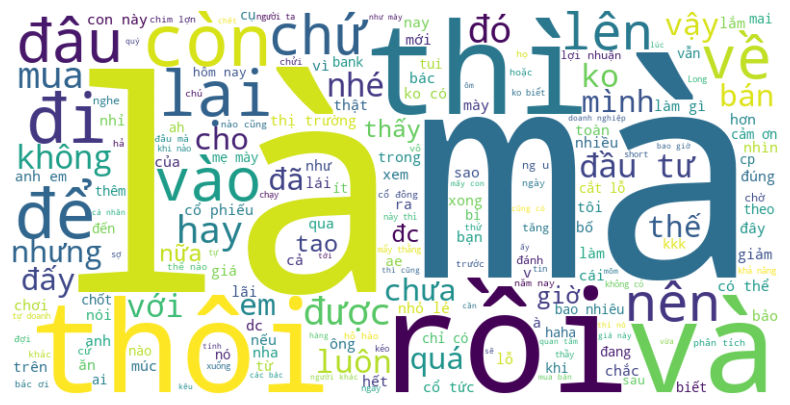

In [50]:
# Kết hợp tất cả văn bản từ cột 'originalContent' của replies_df
text_replies = " ".join(content for content in replies_df.originalContent)

# Tạo wordcloud với giãn cách từ
wordcloud_replies = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=1, relative_scaling=0.5).generate(text_replies)

# Lọc các từ có độ dài lớn hơn 1 ký tự
text_replies_filtered = " ".join(word for word in text_replies.split() if len(word) > 1)

# Tạo wordcloud với giãn cách từ
wordcloud_replies = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=1, relative_scaling=0.5).generate(text_replies_filtered)

# Hiển thị wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_replies, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tiêu chí đánh giá xu hướng